In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 13.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=900a1cd57edb85e1cba3acd2d92cf97bc645206c2d1baf17ae7ab9ccb237b277
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
# import shap
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost.sklearn import XGBRegressor
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn import tree
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Synthetic_data_final.csv')
# da=df.values
y=df['output_nonad']
X=df.drop('output_nonad', 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

shap.initjs()
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)


[10:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_predict = xgb_model.predict(X_test)
mean_squared_error(y_test, y_predict)**(0.5)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_train)
# print(shap_values)
# shap.plots.bar(shap_values)

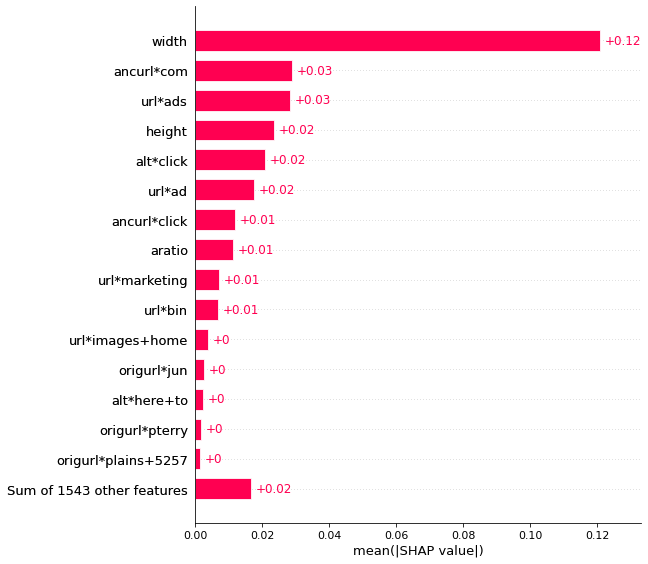

In [ ]:
shap.plots.bar(shap_values,max_display=16)

In [ ]:
#SELECTED COLUMNS.
# cols=['width','aratio','ancurl*com','url*ads','height','alt*click','ancurl*click','url*ad','alt*net','url*bin','url*images+home','ancurl*download','ancurl*keith+dumble','alt*to','output_nonad']
cols = ['width', 'ancurl*com', 'url*ads', 'height', 'alt*click', 'url*ad', 'ancurl*click', 'aratio', 'url*marketing', 'url*bin', 'url*images+home', 'origurl*jun', 'alt*here+to', 'origurl*pterry', 'origurl*plains+5257', 'output_nonad']

dataf=df[cols]
dataf.head()

,width,ancurl*com,url*ads,height,alt*click,url*ad,ancurl*click,aratio,url*marketing,url*bin,url*images+home,origurl*jun,alt*here+to,origurl*pterry,origurl*plains+5257,output_nonad
0,0.375911,1.0,0.0,0.231385,1.0,1.0,0.0,0.050007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.791566,1.0,0.0,0.129897,0.0,1.0,0.0,0.166108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.503152,0.0,0.0,0.094078,0.0,0.0,0.0,0.146127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.791566,0.0,0.0,0.134375,1.0,0.0,0.0,0.159498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.791566,0.0,0.0,0.134375,0.0,0.0,0.0,0.159498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataf.to_csv('Shap_data.csv',index=False)

In [ ]:
#TRAIN MODELS.


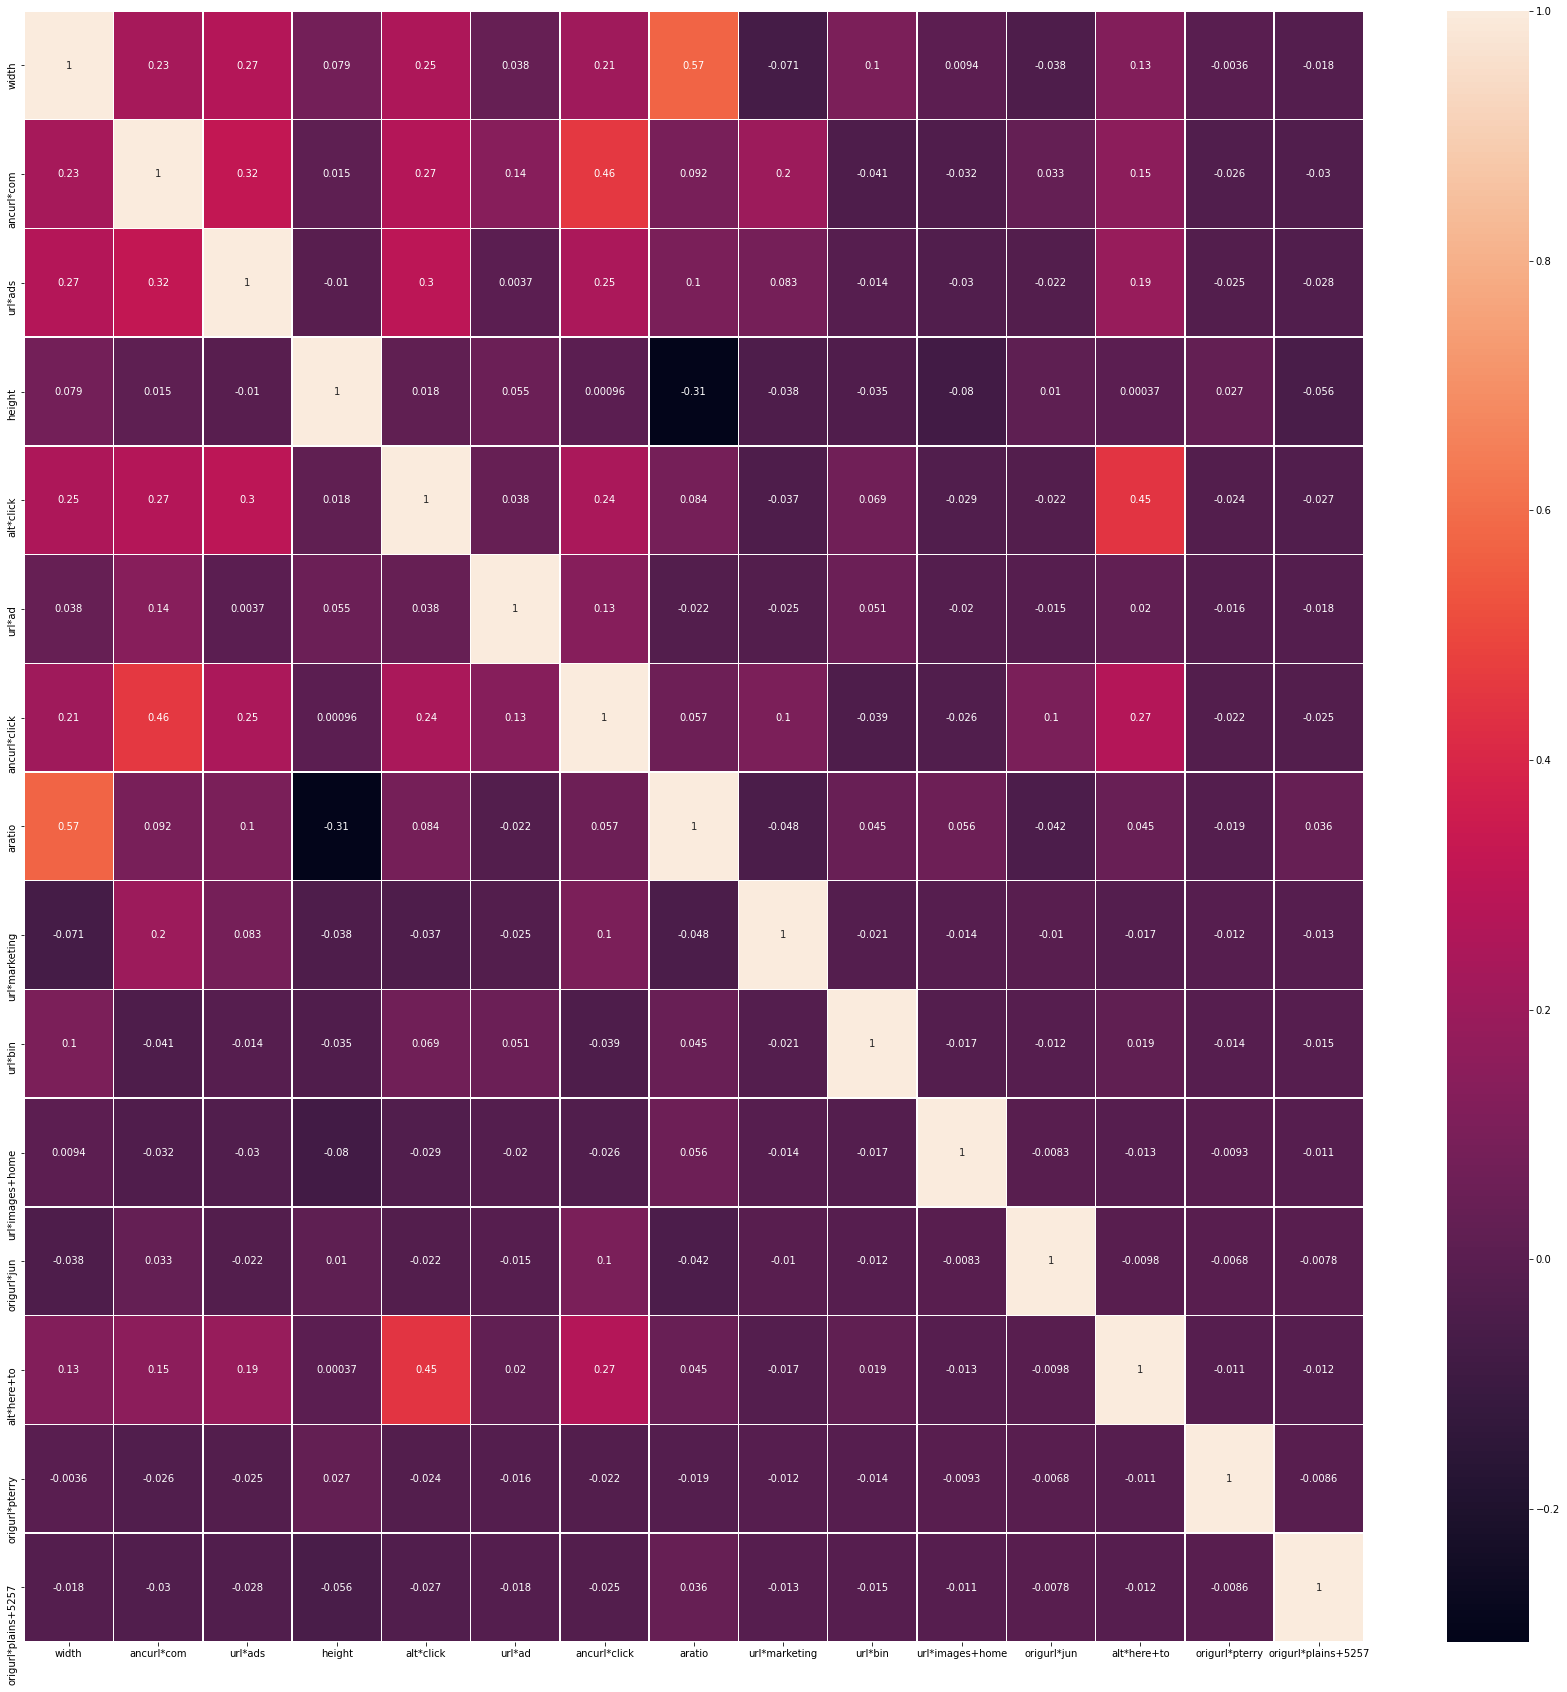

In [ ]:
columns_for_visualization = list()
for i in range(15):
  columns_for_visualization.append(cols[i])

corr=df[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

In [6]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [7]:
da=df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [ ]:
cap_da = df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [ ]:
def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Function(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

In [ ]:
# classifiers=[DecisionTreeClassifier]
classifiers=[SVC, KNeighborsClassifier, RandomForestClassifier, XGBClassifier, LogisticRegression, DecisionTreeClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       409
         1.0       0.96      0.99      0.98       824

    accuracy                           0.97      1233
   macro avg       0.97      0.96      0.96      1233
weighted avg       0.97      0.97      0.97      1233

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       409
         1.0       0.98      0.97      0.97       824

    accuracy                           0.96      1233
   macro avg       0.96      0.96      0.96      1233
weighted avg       0.96      0.96      0.96      1233

__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
# K means cross validation

obj=cross_Function(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.tree._classes.DecisionTreeClassifier'>has 
 || crosss validated accuracy as  -> 0.9579011266511266 | variance - 0.01087321752220933 ||
______________________________________________________________________________________________________________


In [ ]:
param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':np.arange(1,3),
        'p':[2]
        
    }
]

param_RandomForest = [
    {
        # 'n_estimators': np.arange(100, 500, 100)
        # 'max_depth' : [1, 3, 5, 7, 9, 10]
    }
]

param_XGB=[
    {
        # 'n_estimators' : np.arange(100, 500, 100)
    }
]

param_logit = [
  {
      
  }
]

param_XGBoost=[
    {
        # 'n_estimators': np.arange(100, 500, 100)
        # 'max_depth' : [3, 5]
    }
]

param_DTC = [
             {
                 
             }
]

# classifiers=[SVC, KNeighborsClassifier, RandomForestClassifier, XGBClassifier, LogisticRegression, DecisionTreeClassifier]
# classifiers = [RandomForestClassifier]
param_grid_array=[param_DTC]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

{"<class 'sklearn.tree._classes.DecisionTreeClassifier'>": ({},
  0.9519806089986366)}

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

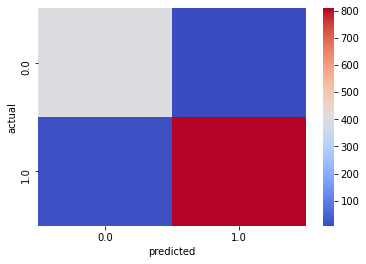

In [ ]:
sns.heatmap(pd.crosstab(ytest,classifier.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
print(classification_report(ytest,classifier.predict(xtest)))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       409
         1.0       0.99      0.98      0.99       824

    accuracy                           0.98      1233
   macro avg       0.98      0.98      0.98      1233
weighted avg       0.98      0.98      0.98      1233



In [8]:
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam

In [23]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [50]:
#model params
model=Sequential()

model.add(Dense(30, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))

model.add(Dense(20,activation='sigmoid'))

# model.add(Dense(20,activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                46770     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 47,411
Trainable params: 47,411
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy','AUC'])

# class_weights={0: 1,
#                 1:2.5,
#                 2: 5}
history = model.fit(X_train1, y_train1, batch_size=64, epochs=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/32
52/52 [==============================] - 1s 9ms/step - loss: 1.1147 - accuracy: 0.3371 - auc: 0.6009 - val_loss: 0.6996 - val_accuracy: 0.4720 - val_auc: 0.9088
Epoch 2/32
52/52 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.6024 - auc: 0.8936 - val_loss: 0.3942 - val_accuracy: 0.9173 - val_auc: 0.9430
Epoch 3/32
52/52 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.8993 - auc: 0.9513 - val_loss: 0.2846 - val_accuracy: 0.9392 - val_auc: 0.9717
Epoch 4/32
52/52 [==============================] - 0s 4ms/step - loss: 0.2771 - accuracy: 0.9386 - auc: 0.9769 - val_loss: 0.2334 - val_accuracy: 0.9416 - val_auc: 0.9786
Epoch 5/32
52/52 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9268 - auc: 0.9792 - val_loss: 0.2035 - val_accuracy: 0.9465 - val_auc: 0.9836
Epoch 6/32
52/52 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9526 - auc: 0.9878 - val_loss: 0.1822 - val_acc

In [52]:
score = model.evaluate(X_test,y_test, verbose=1)
print(score)
print('Test accuracy:', score[1])

26/26 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9708 - auc: 0.9944
[0.09112855792045593, 0.970802903175354, 0.9944496154785156]
Test accuracy: 0.970802903175354


In [ ]:
model.save("shapNN7.h5")

In [64]:
from keras.models import load_model
prevModel = load_model('shapNN5.h5')

In [65]:
score = prevModel.evaluate(X_train,y_train, verbose=1)
print(score)
print('Train accuracy:', score[1])
score = prevModel.evaluate(X_test,y_test, verbose=1)
print(score)
print('Test accuracy:', score[1])
score = prevModel.evaluate(X_val,y_val, verbose=1)
print(score)
print('Validation accuracy:', score[1])

90/90 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9871 - auc: 0.9985
[0.04263935983181, 0.9871259331703186, 0.9985273480415344]
Train accuracy: 0.9871259331703186
26/26 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9732 - auc: 0.9931
[0.09960871934890747, 0.9732360243797302, 0.993113100528717]
Test accuracy: 0.9732360243797302
13/13 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9878 - auc: 0.9994
[0.035281844437122345, 0.9878345727920532, 0.9993566870689392]
Validation accuracy: 0.9878345727920532


In [67]:
prevModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                46770     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 47,411
Trainable params: 47,411
Non-trainable params: 0
_________________________________________________________________


model.save("shapNN5.h5") is the best one till now : 98.44


---


